# Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [2]:
dataset = pd.read_csv("E:\\Khilesh\\Third Year Engineering\\Sem VI\\DSBDA CODES\\Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<Axes: xlabel='Purchased', ylabel='Age'>

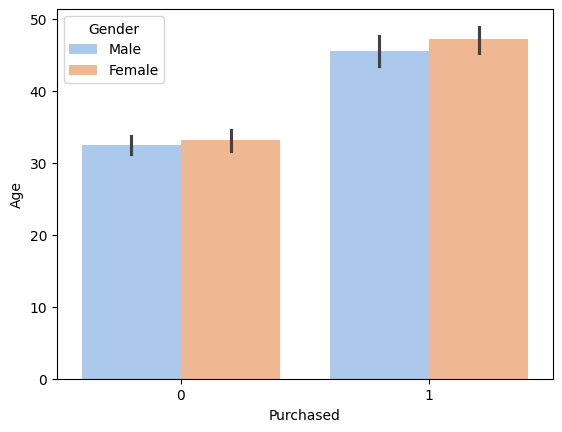

In [36]:
import seaborn as sns
sns.barplot(x='Purchased', y='Age', data = dataset, hue='Gender', palette='pastel')

### Without Transforming Data

In [8]:
x = dataset.drop(columns=['User ID', 'Gender', 'Purchased'])
y = dataset['Purchased']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [11]:
Y_pred = model.predict(X_test)

In [12]:
model.score(X_test, Y_test)

0.84

### By Transforming Data

In [14]:
x = dataset.drop(columns=['User ID', 'Gender', 'Purchased'])
y = dataset['Purchased']

In [16]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size=0.25)
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [18]:
Y_pred = model.predict(X_test)

In [19]:
model.score(X_test, Y_test)

0.86

### Measures of Model

In [31]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print("\nAccuracy Score:", accuracy_score(Y_test, Y_pred))
print("\nError Score:", 1-accuracy_score(Y_test, Y_pred))
print("\nRecall Score:", recall_score(Y_test, Y_pred))
print("\nPrecision Score:", precision_score(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Confusion Matrix:
[[62  7]
 [ 7 24]]

Accuracy Score: 0.86

Error Score: 0.14

Recall Score: 0.7741935483870968

Precision Score: 0.7741935483870968

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        69
           1       0.77      0.77      0.77        31

    accuracy                           0.86       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.86      0.86      0.86       100



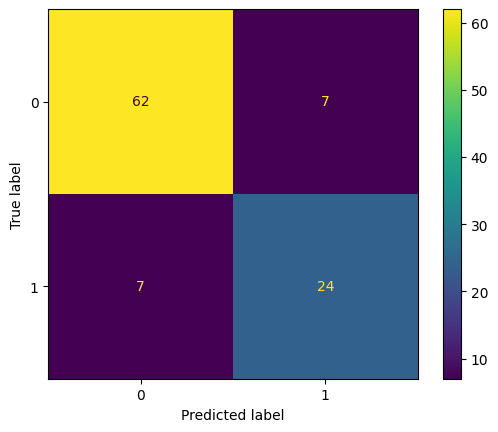

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [29]:
tn, fp, fn, tp = cm.ravel()
print("tn : ", tn, "\nfp : ", fp, "\nfn : ", fn, "\ntp : ", tp) 

tn :  62 
fp :  7 
fn :  7 
tp :  24
